<a href="https://colab.research.google.com/github/NickBear-star/NickBear-star/blob/main/covid_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas
import seaborn
pandas.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plot
%matplotlib inline

In [ ]:
# ---------------------
# Données hospitalières
# ---------------------
# Données issues de l'aggrégation par la DREES des 3 principales bases de données sur la crise Covid-19 :
#  - SI-VAC (hospitalisation),
#  - SI-DEP (dépistage)
#  - VAC-SI (vaccination)
#
# Encodage des variables:
#  - HC = hospitalisation conventionnelle
#  - SC = soin critique
#  - DC = décès
#  - PCR+ = test PCR positif
# 
# Rapport d'analyse de la DREES:
# https://solidarites-sante.gouv.fr/IMG/pdf/2021-07-23_-_sivic-sidep-vacsi_premiers_resultats_-_drees-2.pdf

# Source:
# https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut
csv_url = "https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"
drees = pandas.read_csv(csv_url, sep=';')
drees.date = pandas.to_datetime(drees.date, format='%Y-%m-%d')
#drees = drees.loc[(drees.date >= '2021-05-31') & (drees.date <= '2021-07-11')]

# -----------------------------------------------
# Taux de positivité dans la population française
# -----------------------------------------------
# Données issues du Le Système d’Informations de DEPistage (SI-DEP) géré par Santé Publique France :
# Encodage des variables:
#  - jour = année-mois-jour 
#  - pop = population totale
#  - p = nombre de tests positif
#  - tx_std = taux de positivité standardisé pour 100 000 habitants
# 
# source:
# https://www.data.gouv.fr/fr/datasets/r/59ad717b-b64e-4779-85f6-cd1b25b24703

# Chargement et sélection des données sur la période du 31 mai au 11 juillet 2021 inclus, conformément au rapport DREES
csv_url = "https://www.data.gouv.fr/fr/datasets/r/59ad717b-b64e-4779-85f6-cd1b25b24703"
sidep = pandas.read_csv(csv_url, sep=';')
sidep.jour = pandas.to_datetime(sidep.jour, format='%Y-%m-%d')
#sidep = sidep.loc[(sidep.jour >= '2021-05-31') & (sidep.jour <= '2021-07-11')]


# -----------------------------------------------
# Taux de vaccination dans la population française
# -----------------------------------------------
# Données issues du Le Système d’Informations VACcination (SI-VAC) géré par Santé Publique France :
# Encodage des variables:
#  - jour = année-mois-jour
#  - n_dose1 = nombre de personnes ayant reçu une dose
#  - n_complet = nombre de personne complètement vaccinées
#  - n_cum_dose1 = nombre cumulé de personnes ayant reçu une dose
#  - n_cum_complet = nombre cumulé de personne complètement vaccinées
#  - couv_dose1 = proportion de personnes ayant reçu une dose
#  - couv_complet = proportion de personne complètement vaccinées

# source:
# https://www.data.gouv.fr/fr/datasets/r/efe23314-67c4-45d3-89a2-3faef82fae90

# Chargement et sélection des données sur la période du 31 mai au 11 juillet 2021 inclus, conformément au rapport DREES
csv_url = "https://www.data.gouv.fr/fr/datasets/r/efe23314-67c4-45d3-89a2-3faef82fae90"
sivac = pandas.read_csv(csv_url, sep=';')
sivac.jour = pandas.to_datetime(sivac.jour, format='%Y-%m-%d')
#sivac = sivac.loc[(sivac.jour >= '2021-05-31') & (sivac.jour <= '2021-07-11')]

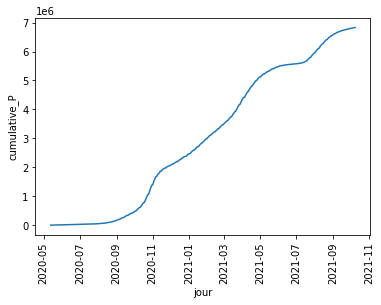

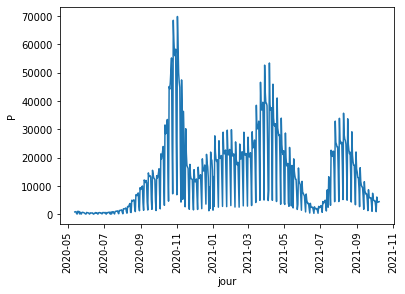

In [10]:
sidep['cumulative_P'] = sidep.P.cumsum()
seaborn.lineplot(data=sidep, x='jour', y='cumulative_P')
plot.xticks(rotation = 'vertical')
plot.show()

seaborn.lineplot(data=sidep, x='jour', y='P')
plot.xticks(rotation = 'vertical')
plot.show()
